# Experiment 01: Ovary Segmentation Baseline

This notebook establishes a baseline performance for ovary segmentation using a standard U-Net architecture. The goal is to create a reference point before implementing the more advanced techniques from the "RAovSeg" paper.

### **Model Configuration**

*   **Objective**: Re-establish baseline for **Ovary Segmentation**.
*   **Model Architecture**: Standard U-Net (from `src/models.py`).
*   **Dataset**: D2_TCPW, filtered for patients with both a T2FS MRI and an ovary mask.
*   **Input Data**: T2-weighted fat suppression (`_T2FS.nii.gz`) MRI scans.
*   **Target Data**: Ovary masks (`_ov.nii.gz`).
*   **Preprocessing**: Min-max normalization to [0, 1].
*   **Data Augmentation**: Simple `RandomAffine` (rotation, translation) and `RandomHorizontalFlip`.
*   **Loss Function**: `DiceBCELoss` (50% Dice, 50% BCE).
*   **Optimizer**: Adam.
*   **Learning Rate**: 1e-4 (constant).
*   **Epochs**: 20.
*   **Batch Size**: 1.
*   **Image Size**: 256x256.
*   **Data Split**: 80% train / 20% validation, split by patient ID.


Using device: cuda

--- Starting Ovary Baseline Model Training ---


Validation: 100%|██████████| 64/64 [00:08<00:00,  7.27it/s]


Epoch 1/20 -> Train Loss: 0.6451, Val Loss: 0.5915, Val Dice: 0.0000
  -> New best model saved at epoch 1 with Val Dice: 0.0000


Validation: 100%|██████████| 64/64 [00:08<00:00,  7.24it/s]


Epoch 2/20 -> Train Loss: 0.5813, Val Loss: 0.6330, Val Dice: 0.2941
  -> New best model saved at epoch 2 with Val Dice: 0.2941


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.95it/s]


Epoch 3/20 -> Train Loss: 0.5453, Val Loss: 0.5028, Val Dice: 0.4264
  -> New best model saved at epoch 3 with Val Dice: 0.4264


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.17it/s]


Epoch 4/20 -> Train Loss: 0.5155, Val Loss: 0.5180, Val Dice: 0.1935


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.55it/s]


Epoch 5/20 -> Train Loss: 0.4897, Val Loss: 0.5346, Val Dice: 0.2590


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.56it/s]


Epoch 6/20 -> Train Loss: 0.4609, Val Loss: 0.4410, Val Dice: 0.3668


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.95it/s]


Epoch 7/20 -> Train Loss: 0.4349, Val Loss: 0.4822, Val Dice: 0.1483


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.47it/s]


Epoch 8/20 -> Train Loss: 0.4128, Val Loss: 0.4511, Val Dice: 0.2038


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.78it/s]


Epoch 9/20 -> Train Loss: 0.3928, Val Loss: 0.4306, Val Dice: 0.2691


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.59it/s]


Epoch 10/20 -> Train Loss: 0.3617, Val Loss: 0.4144, Val Dice: 0.3112


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.51it/s]


Epoch 11/20 -> Train Loss: 0.3521, Val Loss: 0.4914, Val Dice: 0.1056


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.38it/s]


Epoch 12/20 -> Train Loss: 0.3385, Val Loss: 0.4351, Val Dice: 0.2440


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.56it/s]


Epoch 13/20 -> Train Loss: 0.3290, Val Loss: 0.4895, Val Dice: 0.1120


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.51it/s]


Epoch 14/20 -> Train Loss: 0.3195, Val Loss: 0.4192, Val Dice: 0.2603


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.45it/s]


Epoch 15/20 -> Train Loss: 0.3107, Val Loss: 0.4775, Val Dice: 0.1302


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.52it/s]


Epoch 16/20 -> Train Loss: 0.3094, Val Loss: 0.4015, Val Dice: 0.2956


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.47it/s]


Epoch 17/20 -> Train Loss: 0.3049, Val Loss: 0.4804, Val Dice: 0.1299


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.56it/s]


Epoch 18/20 -> Train Loss: 0.3056, Val Loss: 0.4025, Val Dice: 0.3019


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.32it/s]


Epoch 19/20 -> Train Loss: 0.3006, Val Loss: 0.3972, Val Dice: 0.3017


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.43it/s]


Epoch 20/20 -> Train Loss: 0.2935, Val Loss: 0.4648, Val Dice: 0.1601
--- Finished Training ---
Best model was from epoch 3 with a validation Dice score of 0.4264
Model saved to ../models/07_ovary_baseline_best.pth



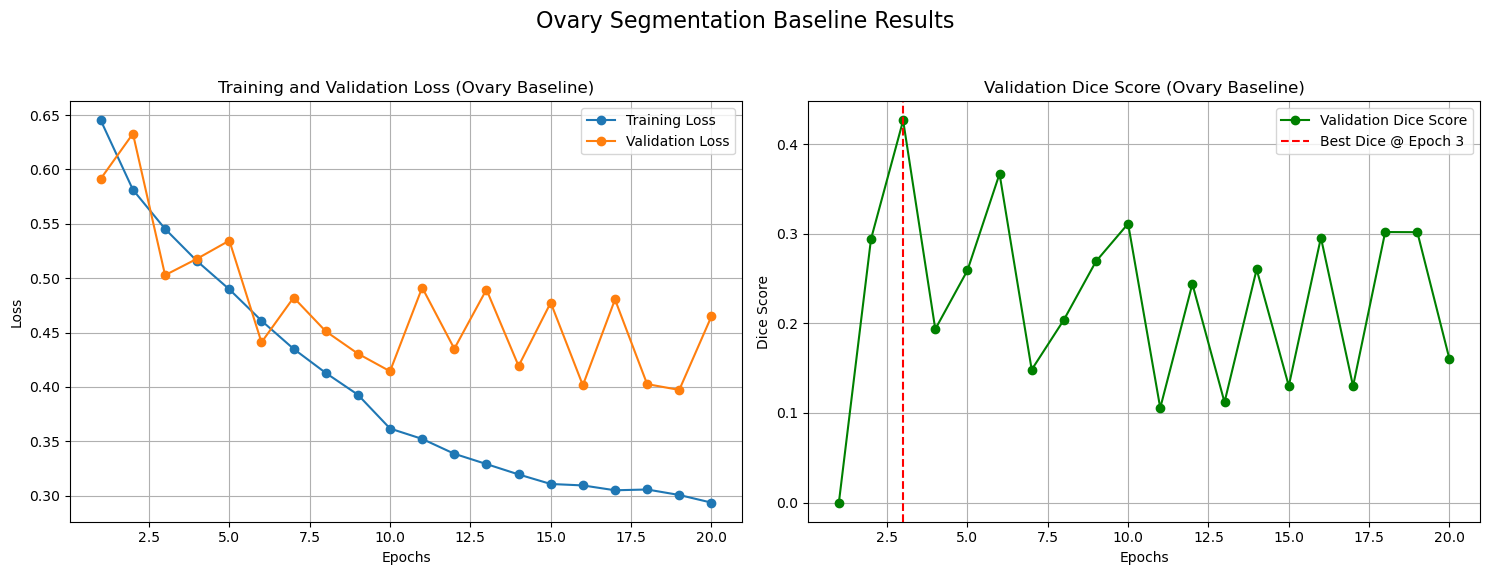

In [4]:
# --- Main Training Loop (UPDATED) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

baseline_model_ovary = UNet(n_channels=1, n_classes=1).to(device)
optimizer = Adam(baseline_model_ovary.parameters(), lr=lr)
criterion = DiceBCELoss()

train_loss_history, val_loss_history, val_dice_history = [], [], []

best_val_dice = -1.0  # Initialize with a value lower than any possible Dice score
best_epoch = -1
model_save_path = "../models/07_ovary_baseline_best.pth"

# Ensure the 'models' directory exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

print("\n--- Starting Ovary Baseline Model Training ---")
for epoch in range(num_epochs):
    train_loss = train_one_epoch(baseline_model_ovary, train_loader, optimizer, criterion, device)
    val_loss, val_dice = validate(baseline_model_ovary, val_loader, criterion, device)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    val_dice_history.append(val_dice)
    
    print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Dice: {val_dice:.4f}")

    # Check if this is the best model so far and save it
    if val_dice > best_val_dice:
        best_val_dice = val_dice
        best_epoch = epoch + 1
        torch.save(baseline_model_ovary.state_dict(), model_save_path)
        print(f"  -> New best model saved at epoch {best_epoch} with Val Dice: {best_val_dice:.4f}")

print("--- Finished Training ---")
print(f"Best model was from epoch {best_epoch} with a validation Dice score of {best_val_dice:.4f}")
print(f"Model saved to {model_save_path}\n")


# --- Visualization ---
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss (Ovary Baseline)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_dice_history, label='Validation Dice Score', color='green', marker='o')
plt.title('Validation Dice Score (Ovary Baseline)')
plt.xlabel('Epochs')
plt.ylabel('Dice Score')
# Highlight the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Dice @ Epoch {best_epoch}')
plt.legend()
plt.grid(True)

plt.suptitle('Ovary Segmentation Baseline Results', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()